# Real Estate Listings Analysis

**Research Objective:**
To identify the parameters that determine the market value of real estate properties.

**Input Data:**
- Source: Data from Yandex Real Estate service — a multi-year archive of apartment listings in Saint Petersburg and nearby localities.
- Structure: Two types of information are available for each listed property:
  - User-provided data.
  - Automatically generated data based on mapping tools (e.g., distances to the city center, airport, nearest park, or water body).

**Research Process:**
The study will be conducted in 5 steps:

1. Data Overview.
2. Data Preprocessing.
3. Enriching the dataset with new parameters.
4. Exploratory Data Analysis.
5. Final Conclusions.

**Dataset Overview:**
The dataset contains 22 columns as described in the documentation:

- `airports_nearest` — distance to the nearest airport (in meters).
- `balcony` — number of balconies.
- `ceiling_height` — ceiling height (in meters).
- `cityCenters_nearest` — distance to the city center (in meters).
- `days_exposition` — number of days the listing was active (from posting to removal).
- `first_day_exposition` — publication date.
- `floor` — floor number.
- `floors_total` — total number of floors in the building.
- `is_apartment` — whether the property is an apartment (boolean).
- `kitchen_area` — kitchen area (in square meters).
- `last_price` — price at the time of removal from publication.
- `living_area` — living area (in square meters).
- `locality_name` — name of the locality.
- `open_plan` — open floor plan (boolean).
- `parks_around3000` — number of parks within a 3 km radius.
- `parks_nearest` — distance to the nearest park (in meters).
- `ponds_around3000` — number of water bodies within a 3 km radius.
- `ponds_nearest` — distance to the nearest water body (in meters).
- `rooms` — number of rooms.
- `studio` — whether the property is a studio (boolean).
- `total_area` — total area of the apartment (in square meters).
- `total_images` — number of images included in the listing.

## Data Overview

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data file and storing it in the df variable
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Displaying the first 20 rows of the df table
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


> From the initial overview, it is evident that the table contains a significant number of missing values. Additionally, some columns use the `float64` data type, which may be introducing unnecessary noise into the data.

In [4]:
# Obtaining general information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# Сhecking for explicit duplicates
df.duplicated().sum()

0

In [6]:
# Сhecking for missing values
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# In the previous step, it was evident that there are many missing values,
# now we calculate the proportion of missing values
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
# Checking statistical data for the columns
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


> The table contains anomalous values, such as ceiling heights of 1 meter and 100 meters, or an apartment with a floor area of 900 square meters.

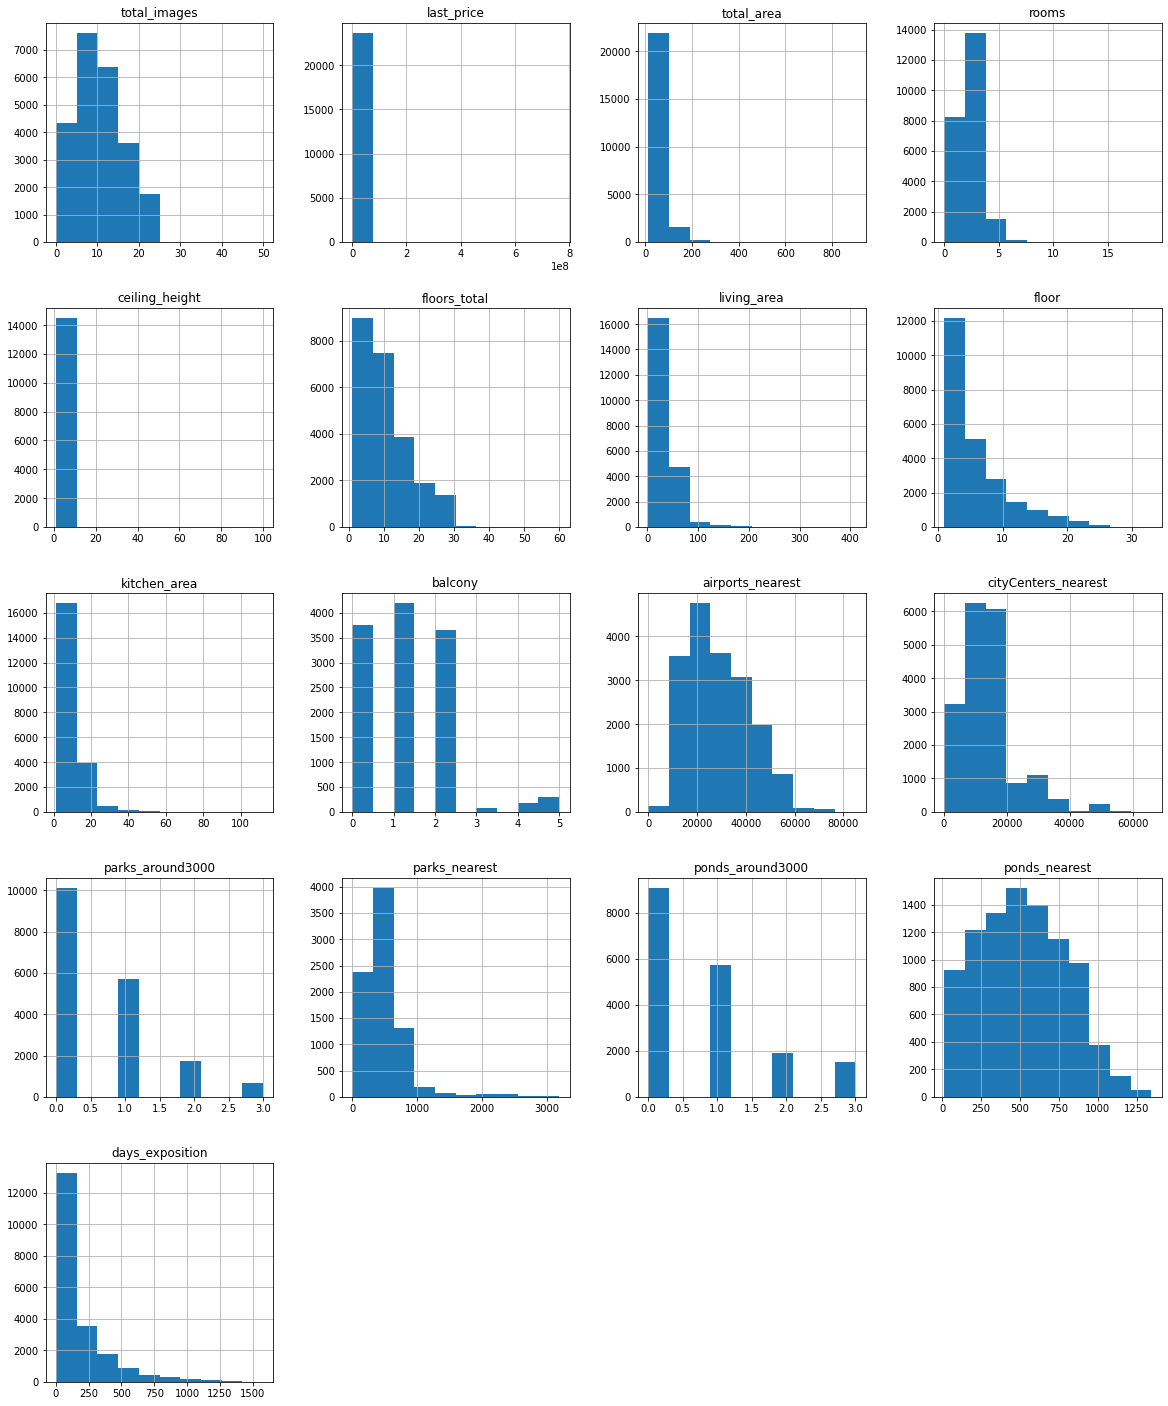

In [9]:
# Plotting histograms for all columns
df.hist(figsize=(20, 25)); 

### Interim Findings 

1. The overview shows that several columns have incorrect data types according to the documentation, such as the `first_day_exposition` and `is_apartment` columns. We will review the data types in more detail later.
2. There are **no explicit duplicates** in the dataset.
3. The dataframe contains **anomalous values** in certain columns.
4. 14 out of 22 columns **have missing values**. We will address this issue in the next step.
5. From the histogram overview, we can observe that most apartments:
- Have between 5 and 10 photos.
- Have a total area of up to 100 m², with a living area of up to 50 m².
- Are 2-3 room apartments.
- Are located in 5-6 story buildings (likely older buildings, as 5-6 story structures were built actively in Saint Petersburg from the early 1900s and post-war period).
- Are situated no higher than the 4th floor.
- Have kitchens up to 12 m².
- Have balconies.
- Are located about 20 km from the airport.
- Are 8-20 km from the city center.
- Were sold in less than 200 days.

## Data Preprocessing


### Handling Missing Values

> We will focus on columns where the percentage of missing values exceeds 10%:

> - A significant portion of the missing data (ranging from 23% to 65%) is found in columns with mapping characteristics. These missing values are likely due to errors during data extraction, and we will not be able to recover them without compromising the quality of the dataframe.
> - Among the user-added data, the columns with the highest proportion of missing values are `ceiling_height` (38.8%) and `balcony` (48.6%). These columns will be addressed in the current step.
> - There is also a considerable number of missing values in the `days_exposition` column (13.4%). Since the data for this column should be automatically generated, this could also be due to an extraction error.
> - We will exclude the missing values in the `is_apartment` column for now due to mismatched data types according to the documentation.

> Let's focus on handling the missing values in the **user-provided data**, where more than 10% of values are missing:

> - `ceiling_height`: It is likely that the missing values in this column are not due to extraction errors. More probably, users chose not to fill in this field either because they did not have precise data or did not consider it important. We can attempt to fill in the missing values using the median, which correlates with the number of floors in the building. My hypothesis is that, for example, 5-6 story buildings (as mentioned earlier, likely older buildings) would have ceiling heights in line with historical standards, while high-rise buildings over 15 floors, built to more modern standards, would have different ceiling heights.

> - `balcony`: For this column, I will follow the hypothesis outlined in the project description, which seems quite logical. Missing data might occur because users did not indicate the number of balconies due to their absence. Therefore, we will replace the missing values with zeros.

#### ceiling_height

In [10]:
# Checking the median values, which are typical for buildings of different heights
df.groupby('floors_total')['ceiling_height'].median() 

floors_total
1.0      2.80
2.0      2.70
3.0      2.80
4.0      3.00
5.0      2.55
6.0      3.00
7.0      3.00
8.0      2.80
9.0      2.55
10.0     2.60
11.0     2.75
12.0     2.65
13.0     2.70
14.0     2.60
15.0     2.70
16.0     2.70
17.0     2.70
18.0     2.70
19.0     2.75
20.0     2.75
21.0     2.70
22.0     2.75
23.0     2.75
24.0     2.75
25.0     2.75
26.0     2.66
27.0     2.70
28.0     2.60
29.0     2.60
33.0      NaN
34.0     2.65
35.0     2.70
36.0    14.85
37.0     1.75
52.0     2.65
60.0     2.88
Name: ceiling_height, dtype: float64

> There is a wide range of building heights, we group the data as follows:
> - Group 1: 1-6 floors
> - Group 2: 7-9 floors
> - Group 3: 10-20 floors
> - Group 4: 21-30 floors
> - Group 5: 31-60 floors

In [11]:
# Creating a function to assign groups
def ceiling_height(row): 
    
    floor = row['floors_total']

    if floor <= 6:
        return 'group 1'
    
    if floor <= 9 and floor > 6:
        return 'group 2'
    
    if floor <= 20 and floor > 9:
        return 'group 3'

    if floor <= 30 and floor > 20:
        return 'group 4'
    
    if floor <= 60 and floor > 30:
        return 'group 5'


In [12]:
# Creating a new column with the results of the function
df['floor_group'] = df.apply(ceiling_height, axis=1)

In [13]:
# Finding the median by groups
df.groupby('floor_group')['ceiling_height'].median()

floor_group
group 1    2.64
group 2    2.55
group 3    2.70
group 4    2.75
group 5    2.70
Name: ceiling_height, dtype: float64

In [14]:
# Filling missing values in 'ceiling_height' with median values by group
for t in df['floor_group'].unique():
    df.loc[(df['floor_group'] == t) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['floor_group'] == t), 'ceiling_height'].median() 

In [15]:
# Checking for missing values again
df['ceiling_height'].isna().sum()

77

> Out of 9,195 missing values, only 77 remain, so we will keep the column as is.

#### balcony

In [16]:
# Let's assume that if there is a missing value, it's likely that the apartment doesn't have a balcony
# Therefore, we fill NaN values in the 'balcony' column with zeros
df['balcony'] = df['balcony'].fillna(0)

In [17]:
df['balcony'].isna().sum()

0

> The `balcony` column is free of missing values.

### Data Type Conversion

> **Data types:**

> - According to the documentation, three columns should have a boolean data type: `studio`, `open_plan`, and `is_apartmen`. From the data overview, we see that `is_apartmen` has the object type. We will convert the values in this column to the bool type.
> - We will convert the `first_day_exposition` column to the datetime format.
> - The data in the columns `last_price`, `floors_total`, and `balcony` suggest integer values, so we will change their data type from float64 to int64.

In [18]:
# Converting the 'is_apartment' column to boolean values
df['is_apartment'] = df['is_apartment'].astype('bool')

> We will change the data type to `int` in the columns with geographic data where there are no missing values, as `NaN` can only be present in `float64`. For the columns with a small number of missing values (5-10%), we will remove them.

In [19]:
# Removing rows with missing values in the 'floors_total' column
df = df.dropna(subset=['floors_total'])

In [20]:
# Changing the format of the 'first_day_exposition' column to datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [21]:
# Converting specified columns to integer data type
change_to_int = ['last_price', 'balcony', 'floors_total']

for column in change_to_int:
    df[column] = df[column].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

> The columns have the correct data types.

### Removing implicit duplicates

In [23]:
# First, remove missing values in the 'locality_name' column, as there are only a few
df = df.dropna(subset=['locality_name'])

In [24]:
df['locality_name'].isna().sum()

0

In [25]:
# Checking unique names of localities
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

> In the column, there are quite a few implicit duplicates due to additional information about the type of locality. We will keep only the proper names.

In [26]:
# Create a function with a regular expression to remove unnecessary information from the strings
import re 

def only_upper(row):
    return re.sub(r'\b[а-яё]+\s*', "", row['locality_name']).strip() 

In [27]:
# Create a new column with only proper names
df['locality_name_short'] = df.apply(only_upper, axis=1) 

In [28]:
# Checking how the function worked
df['locality_name_short'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

### Removing anomalies

>The dataframe contains **anomalous values** in the following columns:
>- `last_price` (prices range from 12,000 to 763 million);
>- `total_area` (apartment sizes range from 12 to 900 m²);
>- `rooms` (a 19-room apartment);
>- `ceiling_height` (ceiling heights range from 1 to 100 meters);
>- `living_area` (from 2 to 409 m²);
>- `kitchen_area` (from 1.3 to 112 m²);
>- `days_exposition` (the listing was active for 1580 days, likely due to the user forgetting to remove it).

In [29]:
df[['last_price', 'total_area', 'rooms','ceiling_height', 'living_area', 'kitchen_area', 'days_exposition']]\
.describe()

,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area,days_exposition
count,2.356500e+04,23565.000000,23565.000000,23565.000000,21700.000000,21343.000000,20394.000000
mean,6.540058e+06,60.322824,2.070656,2.728450,34.454822,10.560994,180.741395
std,1.091093e+07,35.657060,1.078591,0.991512,22.045359,5.900630,219.732782
min,1.219000e+04,12.000000,0.000000,1.000000,2.000000,1.300000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.550000,18.600000,7.000000,45.000000
50%,4.646000e+06,52.000000,2.000000,2.650000,30.000000,9.100000,95.000000
75%,6.790000e+06,69.700000,3.000000,2.750000,42.300000,12.000000,231.000000
max,7.630000e+08,900.000000,19.000000,100.000000,409.700000,112.000000,1580.000000


In [30]:
# Convert the price to millions for convenience
df['last_price'] = df['last_price']/1000000

> Create a box plot for each column to identify outliers

(-1.0, 12.0)

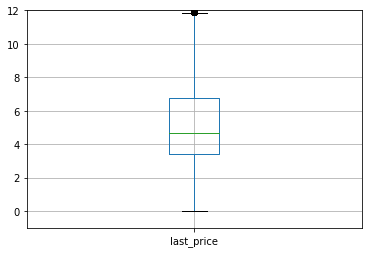

In [31]:
df[['last_price']].boxplot()
plt.ylim(-1, 12)

(10.0, 115.0)

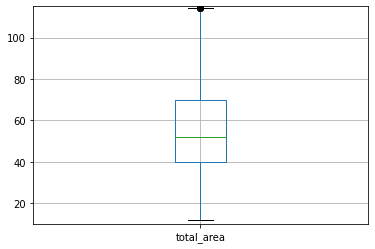

In [32]:
df[['total_area']].boxplot()
plt.ylim(10, 115)

(-1.0, 10.0)

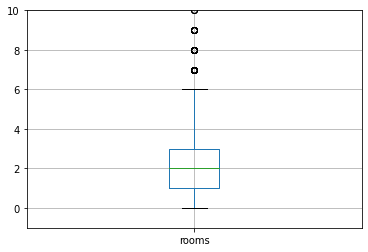

In [33]:
df[['rooms']].boxplot()
plt.ylim(-1, 10)

(2.0, 3.1)

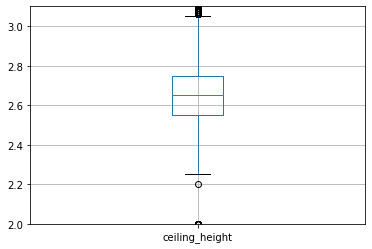

In [34]:
df[['ceiling_height']].boxplot()
plt.ylim(2, 3.1)

(0.0, 80.0)

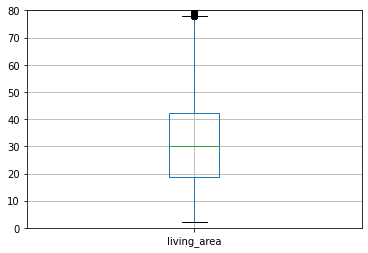

In [35]:
df[['living_area']].boxplot()
plt.ylim(0, 80)

(0.0, 20.0)

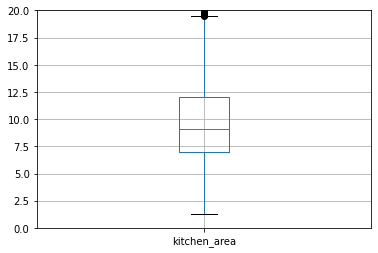

In [36]:
df[['kitchen_area']].boxplot()
plt.ylim(0, 20)

(0.0, 500.0)

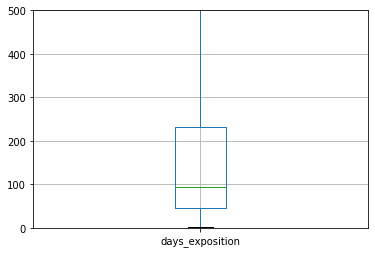

In [37]:
df[['days_exposition']].boxplot()
plt.ylim(0, 500)

> Based on the box plots, we define the data boundaries for each column as follows:
>- `last_price`: 0 to 12 million;
>-  `total_area`: 10 to 115 m²;
>-  `rooms`: 0 to 6 rooms;
>-  `ceiling_height`: 2.2 to 3.1 meters;
>-  `living_area`: 0 to 80 m²;
>-  `kitchen_area`: 0 to 20 m²;
>-  `days_exposition`: 0 to 500 days.

In [38]:
# Filtering the dataset to keep rows within specified value ranges for each column, removing outliers
df = df.query('0<= last_price <=12\
and 10<= total_area <=115\
and 0<= rooms <=6\
and 2.2<= ceiling_height <=3.1\
and 0<= living_area <=80\
and 0<= kitchen_area <=20\
and 0<= days_exposition <=500')

In [39]:
# Checking how the data has been overwritten
df[['last_price', 'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area', 'days_exposition']]\
.describe() 

,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area,days_exposition
count,14629.000000,14629.000000,14629.000000,14629.000000,14629.000000,14629.000000,14629.000000
mean,4.673618,51.511169,1.879623,2.650305,29.377823,9.190749,126.134664
std,2.029453,16.617919,0.848724,0.122624,12.114591,2.943352,118.509522
min,0.450000,14.000000,1.000000,2.200000,2.000000,2.000000,1.000000
25%,3.300000,38.500000,1.000000,2.550000,18.000000,7.000000,38.000000
50%,4.300000,47.200000,2.000000,2.640000,28.600000,8.800000,84.000000
75%,5.650000,61.300000,2.000000,2.700000,37.600000,11.000000,180.000000
max,12.000000,115.000000,6.000000,3.100000,80.000000,20.000000,500.000000


### Interim Findings 

1. We handled missing values in the `ceiling_height` (replaced missing values with the median, which correlates with the number of floors) and `balcony` (replaced missing values with zeros) columns.
2. We changed the data types in the following columns:
- `is_apartment` from object to bool;
- `first_day_exposition` from object to datetime;
- `last_price`, `floors_total`, `balcony` from float to int.
3. We eliminated implicit duplicates in the `locality_name` column by removing the type of settlement and retaining only the proper names.
4. We removed outliers in the following columns: `last_price`, `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area`, `days_exposition`.
5. We converted `last_price` data into millions for convenience.

## Enriching the Dataset with New Parameters

In [40]:
# Calculate the price per square meter
df['price_of_m2'] = df['last_price']/df['total_area']*1000000

In [41]:
# Determine the day of the week for the publication
df['weekday'] = df['first_day_exposition'].dt.weekday

In [42]:
# Determine the month of the publication
df['month'] = df['first_day_exposition'].astype('datetime64[M]')

In [43]:
df['month'].head()

1   2018-12-01
5   2018-09-01
6   2017-11-01
8   2018-05-01
9   2017-02-01
Name: month, dtype: datetime64[ns]

In [44]:
# Determine the year of the publication
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [45]:
# Function to determine the floor type of the apartment
def floor_name(df): 
    
    if df.floor == 1:
        return 'first'
    
    elif df.floor == df.floors_total:
        return 'last'
    
    else:
        return 'other'

In [46]:
# Apply the floor_name function to create a new column with the floor type (first, last, or other)
df['floor_name'] = df.apply(floor_name, axis=1)

In [47]:
# Convert the distance to the city center to kilometers
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000

In [48]:
# Round the values to 1 decimal place
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round() 

In [49]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_group,locality_name_short,price_of_m2,weekday,month,year,floor_name,cityCenters_nearest_km
1,7,3.35,40.40,2018-12-04,1,2.70,11,18.60,1,True,...,NaN,81.0,group 3,Шушары,82920.792079,1,2018-12-01,2018,first,19.0
5,10,2.89,30.40,2018-09-10,1,2.70,12,14.40,5,True,...,NaN,55.0,group 3,Янино-1,95065.789474,0,2018-09-01,2018,other,NaN
6,6,3.70,37.30,2017-11-02,1,2.75,26,10.60,6,True,...,NaN,155.0,group 4,Парголово,99195.710456,3,2017-11-01,2017,other,19.0
8,20,2.90,33.16,2018-05-23,1,2.75,27,15.43,26,True,...,NaN,189.0,group 4,Мурино,87454.764777,2,2018-05-01,2018,other,NaN
9,18,5.40,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,NaN,289.0,group 2,Санкт-Петербург,88524.590164,6,2017-02-01,2017,other,15.0
10,5,5.05,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,553.0,137.0,group 3,Санкт-Петербург,127525.252525,3,2017-11-01,2017,other,14.0
11,9,3.30,44.00,2018-08-27,2,2.64,5,31.00,4,False,...,NaN,7.0,group 1,Ломоносов,75000.000000,0,2018-08-01,2018,other,52.0
12,10,3.89,54.00,2016-06-30,2,2.64,5,30.00,5,True,...,NaN,90.0,group 1,Сертолово,72037.037037,3,2016-06-01,2016,last,NaN
13,20,3.55,42.80,2017-07-01,2,2.56,5,27.00,5,True,...,298.0,366.0,group 1,Петергоф,82943.925234,5,2017-07-01,2017,last,33.0
14,1,4.40,36.00,2016-06-23,1,2.64,6,17.00,1,True,...,96.0,203.0,group 1,Пушкин,122222.222222,3,2016-06-01,2016,first,31.0


### Interim Findings

At this stage, we have added the following columns to the dataframe:

- `price_of_m2`: price per square meter.
- `weekday`: day of the week the listing was posted (0 - Monday, 1 - Tuesday, and so on).
- `month`: month the listing was posted.
- `year`: year the listing was posted.
- `floor_name`: type of the apartment floor (values: "first", "last", "other").
- `cityCenters_nearest_km`: distance to the city center in kilometers (converted from meters and rounded).

## Exploratory Data Analysis

### Studying the Property Parameters

>In this section, we will explore the following property parameters:
>- total area;
>- living area;
>- kitchen area;
>- property price;
>- number of rooms;
>- ceiling height;
>- apartment floor;
>- floor type ("first", "last", "other");
>- total number of floors in the building;
>- distance to the city center;
>- distance to the nearest airport;
>- distance to the nearest park;
>- day and month of the listing publication.

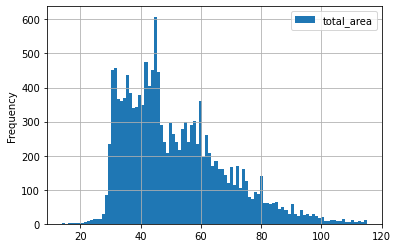

In [50]:
df.plot(
    kind='hist', 
    y='total_area', 
    bins = 100,
    grid=True,
    legend=True
);                    

> In the outlier-free data, apartments with an area of 30-60 m2 are predominant.

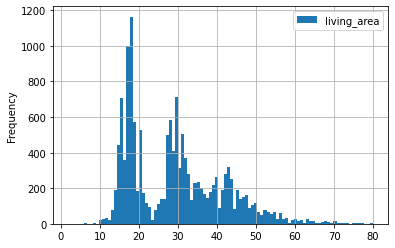

In [51]:
df.plot(
    kind='hist', 
    y='living_area', 
    bins = 100,
    grid=True,
    legend=True
); 

> The living area is mainly represented in two ranges: 15-23 m2 and 25-58 m2.

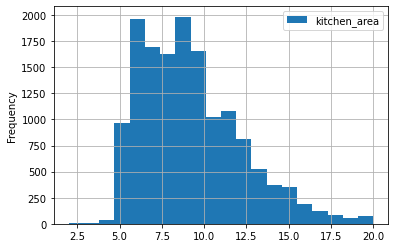

In [52]:
df.plot(
    kind='hist', 
    y='kitchen_area', 
    bins = 20,
    grid=True,
    legend=True
); 

> The kitchen area ranges from 4 to 16 m2.

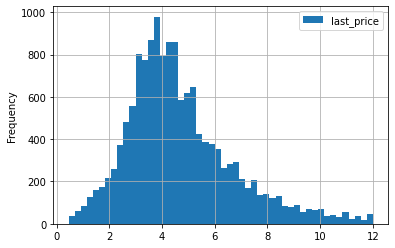

In [53]:
df.plot(
    kind='hist', 
    y='last_price', 
    bins = 50,
    grid=True,
    legend=True
);

>The majority of prices are in the range of 2 to 5.5 million rubles.

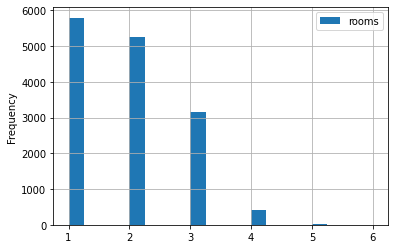

In [54]:
df.plot(
    kind='hist', 
    y='rooms', 
    bins = 20,
    grid=True,
    legend=True
);                                                     

> The sample is dominated by 1-2 room apartments.

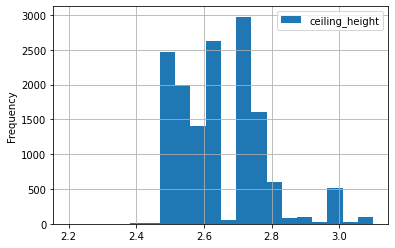

In [55]:
df.plot(
    kind='hist', 
    y='ceiling_height', 
    bins = 20,
    grid=True,
    legend=True
);  

> Ceiling height is distributed across two ranges: 2.45-2.65 meters and 2.7-2.85 meters.

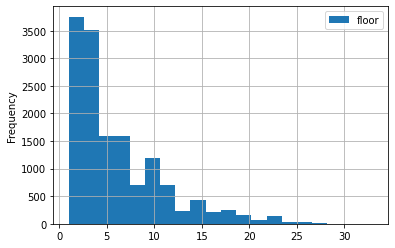

In [56]:
df.plot(
    kind='hist', 
    y='floor', 
    bins = 20,
    grid=True,
    legend=True
);  

>Most apartments are located on the 2nd to 4th floors.

In [57]:
floors_value_counts = df['floor_name'].value_counts()

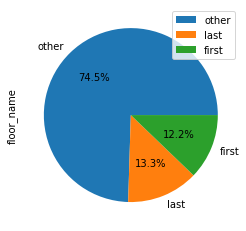

In [58]:
floors_value_counts.plot(kind='pie', autopct='%1.1f%%', legend=True);  

> Apartments on the first and last floors make up a quarter of the sample.

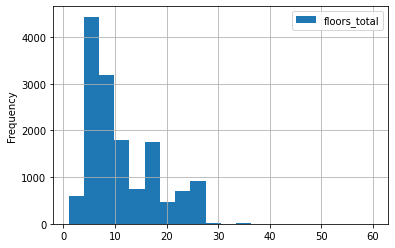

In [59]:
df.plot(
    kind='hist', 
    y='floors_total', 
    bins = 20,
    grid=True,
    legend=True
);  

> The most apartments are located on the 5th-7th and 9th-11th floors.

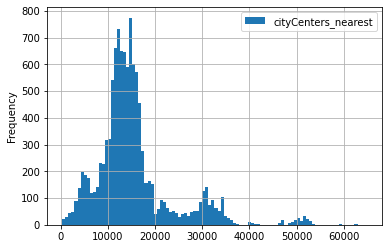

In [60]:
df.plot(
    kind='hist', 
    y='cityCenters_nearest', 
    bins = 100,
    grid=True,
    legend=True
);  

> The majority of apartments are located at a distance of 8-20 km from the city center.

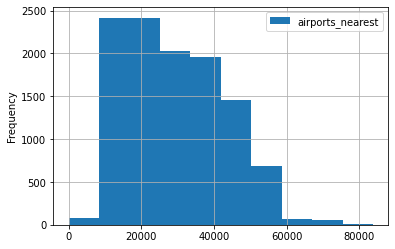

In [61]:
df.plot(
    kind='hist', 
    y='airports_nearest', 
    bins = 10,
    grid=True,
    legend=True
);  

> Most often, the airport is located at a distance of 10-58 km from the property.

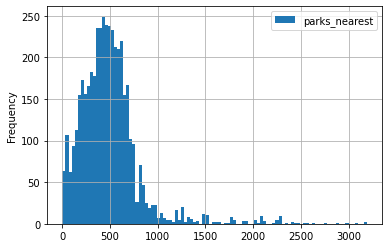

In [62]:
df.plot(
    kind='hist', 
    y='parks_nearest', 
    bins = 100,
    grid=True,
    legend=True
);  

>If there is a park near the apartment, it is most often located within 1 km.

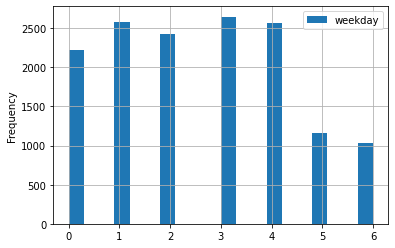

In [63]:
df.plot(
    kind='hist', 
    y='weekday', 
    bins = 20,
    grid=True,
    legend=True
);  

> Users most frequently posted sale ads during the workweek and less often on weekends.

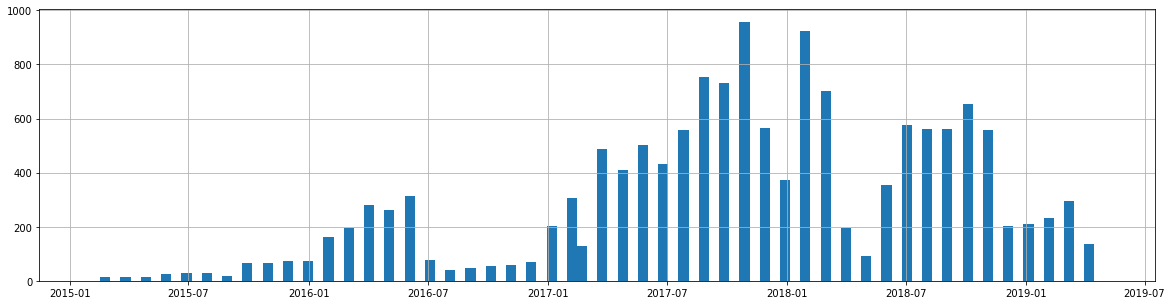

In [64]:
df['month'].hist(bins=100, figsize=(20, 5));

> The dataset contains a small number of records from 2015-2016 and an incomplete set for 2019. Let's focus on 2017 and 2018. The main surge in ad postings began in January 2017, with March 2017 being the least popular month for publishing. The peak of the entire period occurred in November 2017. In 2018, there was a drop in May, while the highest number of ads in 2018 was recorded in February (almost 1,000 listings).

### How quickly were the apartments sold?

(0.0, 400.0)

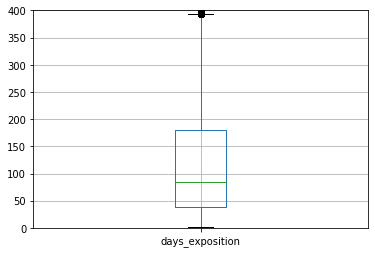

In [65]:
# To answer the question of how quickly apartments were sold, we'll create a boxplot
# Set the y-axis limits to focus on relevant data range
df[['days_exposition']].boxplot()
plt.ylim(0, 400)

In [66]:
df[['days_exposition']].describe()

,days_exposition
count,14629.000000
mean,126.134664
std,118.509522
min,1.000000
25%,38.000000
50%,84.000000
75%,180.000000
max,500.000000


> The listings were online for an average of 126 days, with the median being around 90 days.
> Typically, the sale took between 40 and 180 days.
> Sales up to 38 days can be considered fast, while those from 180 to 390 days are considered long.

### What factors influence the overall cost of the property?

> Let's explore whether the price depends on:
>-  total area;
>- living area;
>- kitchen area;
>- number of rooms;
>- floor on which the apartment is located (first, last, other);
>- posting date (day of the week, month, year).

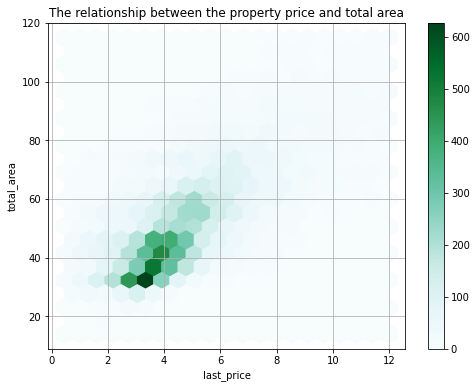

In [67]:
df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6),\
        sharex=False, grid=True, title = 'The relationship between the property price and total area');

In [68]:
# Calculating the correlation
df['last_price'].corr(df['total_area'])

0.6938710626632364

> The chart and the correlation coefficient of 0.69 confirm that there is definitely a relationship between the price and the total area.

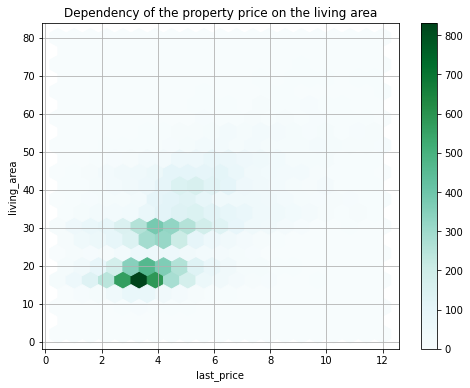

In [69]:
df.plot(x='last_price', y='living_area', kind='hexbin', gridsize=20,\
        figsize=(8, 6), sharex=False, grid=True, title = 'Dependency of the property price on the living area'); 

In [70]:
df['last_price'].corr(df['living_area'])

0.5615431308717924

> In the next graph, we can also observe a clear data structure, with a correlation of 0.56.

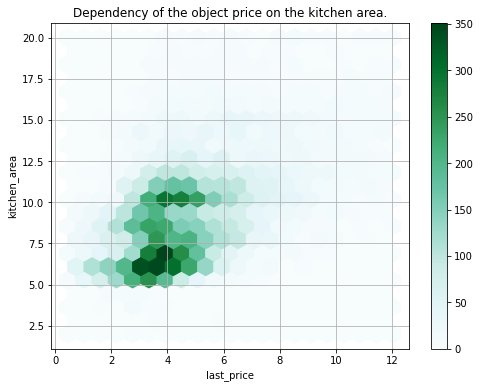

In [71]:
df.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=20, figsize=(8, 6),\
        sharex=False, grid=True, title = 'Dependency of the object price on the kitchen area.'); 

In [72]:
df['last_price'].corr(df['kitchen_area'])

0.48058160779105547

>In the case of the kitchen area, the dependency is weaker, with a correlation of 0.48.

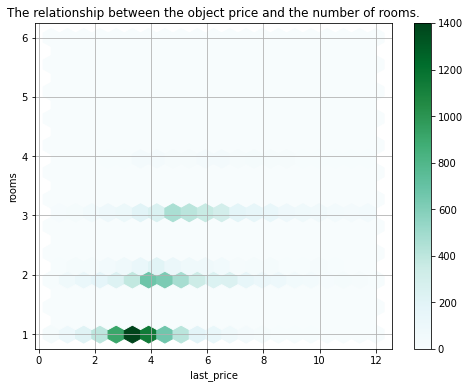

In [73]:
df.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6),\
        sharex=False, grid=True, title = 'The relationship between the object price and the number of rooms.'); 

In [74]:
df['last_price'].corr(df['rooms'])

0.43285958491060134

> There is a relationship between the price and the number of rooms, with a correlation of 0.43.

In [75]:
# creating a pivot table
floor_name_corr = df.pivot_table(index='floor_name', values='last_price', aggfunc = ['median'])
floor_name_corr.columns = ['median_floor_price']
floor_name_corr.head()

,median_floor_price
floor_name,
first,3.7000
last,3.9500
other,4.4675


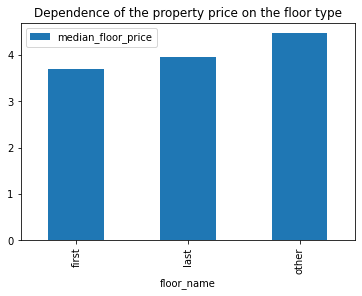

In [76]:
floor_name_corr.plot(kind='bar', legend=True, title = 'Dependence of the property price on the floor type');  

> Apartments on the first floor tend to be cheaper compared to others. Traditionally, first and top-floor apartments are considered less convenient for living, which is reflected in their lower prices.

In [77]:
weekday_corr = df.pivot_table(index='weekday', values='last_price', aggfunc = ['median'])
weekday_corr.columns = ['median_weekday_price']
weekday_corr.head(7)

,median_weekday_price
weekday,
0,4.3000
1,4.2800
2,4.3000
3,4.3000
4,4.2500
5,4.2975
6,4.2150


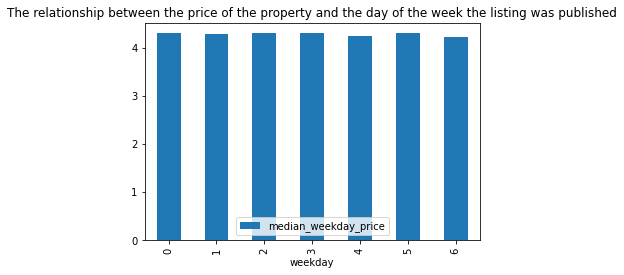

In [78]:
weekday_corr.plot(kind='bar', legend=True, title = 'The relationship between the price of the property and the day of the week the listing was published');  

>The day of the week when the listing was published does not affect pricing.

In [79]:
month_corr = df.pivot_table(index='month', values='last_price', aggfunc = ['median'])
month_corr.head(10)

,median
,last_price
month,
2015-02-01,7.700
2015-03-01,3.750
2015-04-01,5.239
2015-05-01,3.800
2015-06-01,4.075
2015-07-01,5.400
2015-08-01,3.885
2015-09-01,5.100


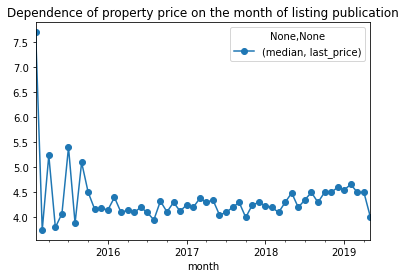

In [80]:
month_corr.plot(style='o-', title = 'Dependence of property price on the month of listing publication')
plt.show()

> The graph shows that property prices in 2015 were quite unstable, with numerous peaks and dips. Price dynamics began to stabilize toward the end of 2015. From 2016 to 2019, a gradual increase in prices can be observed.

In [81]:
year_corr = df.pivot_table(index='year', values='last_price', aggfunc = ['median'])
year_corr.head(20)

,median
,last_price
year,
2015,4.3245
2016,4.1500
2017,4.2000
2018,4.3000
2019,4.5995


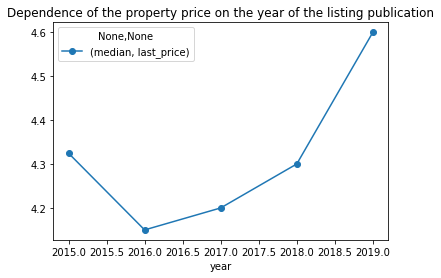

In [82]:
year_corr.plot(style='o-', title = 'Dependence of the property price on the year of the listing publication')
plt.show()

> In this chart, we also see an increase in property prices starting from 2016.

> **Off-topic comment:** It seems not entirely correct to look for a dependency between price and the day of the week the listing was published, as we only have information about the total price of the apartment when the listing was removed from sale.

### What is the average price per square meter in the 10 locations with the highest number of listings?

In [83]:
df_pivot_price_of_m2 = df.pivot_table(index= 'locality_name_short', values='price_of_m2', aggfunc=('median', 'count'))
df_pivot_price_of_m2.columns = ['total_ads', 'm2_median']
df_pivot_price_of_m2.sort_values('total_ads', ascending=False).round().head(10).reset_index()

,locality_name_short,total_ads,m2_median
0,Санкт-Петербург,9431,100649.0
1,Мурино,394,85686.0
2,Шушары,338,76037.0
3,Кудрово,300,95469.0
4,Всеволожск,265,65083.0
5,Колпино,264,73629.0
6,Парголово,248,91580.0
7,Гатчина,222,66667.0
8,Пушкин,219,96923.0
9,Петергоф,147,81788.0


>As expected, the highest price per square meter is in St. Petersburg, while the lowest price is in Peterhof.

### How the price of properties depends on the distance from the city center?

In [84]:
df['city_center_km2'] = df['last_price'] / df['cityCenters_nearest_km']

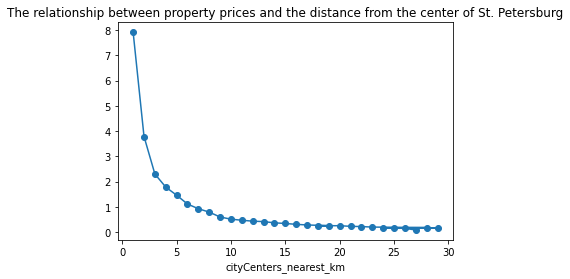

In [85]:
df_filtered = df.query('locality_name_short == "Санкт-Петербург"')
df_filtered.groupby('cityCenters_nearest_km').mean()['city_center_km2'].sort_values(ascending=False)\
    .plot(style='o-', title = 'The relationship between property prices and the distance from the center of St. Petersburg')
plt.show()

>The graph shows that the distance directly affects the price per square meter of apartments in St. Petersburg.

## Final Conclusions

We conducted the research in four stages.

**Data Overview:**

We identified the following issues:

- Several columns had data types inconsistent with the documentation.
- The dataframe contained anomalous values in some columns.
- There were missing values in 14 out of 22 columns.

**Data Preprocessing:**

We took the following steps:

- Handled missing values in the `ceiling_height` and `balcony` columns.
- Changed the data types in the following columns: `is_apartment`, `first_day_exposition`, `last_price`, `floors_total`, `balcony`.
- Removed implicit duplicates in the `locality_name` column.
- Eliminated outliers in the following columns: `last_price`, `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area`, `days_exposition`.
- Converted the `last_price` data into millions.

**Enriching the Dataset with New Parameters:**

We added the following columns to the dataframe:

- `price_of_m2`: price per square meter;
- `weekday`: day of the week when the ad was posted (0 - Monday, 1 - Tuesday, etc.);
- `month`: month of the ad publication;
- `year`: year of the ad publication;
- `floor_name`: floor type of the apartment (values - "first", "last", "other");
- `cityCenters_nearest_km`: distance to the city center in kilometers (converted from meters and rounded).

**Exploratory Data Analysis:**


1. We analyzed various parameters using visualizations.
2. We analyzed the speed of apartment sales:

- On average, listings were active for 126 days.
- The median duration was around 90 days.
- Typically, sales took between 40 and 180 days.
- Listings under 38 days can be considered fast, and those between 180-390 days are long.
3. We examined the factors affecting the overall property price. We found that the following factors influence the price to varying degrees:

- Total area;
- Living area;
- Kitchen area;
- Number of rooms;
- Floor type (first, last, other);
- Year of listing publication.

The day of the week the listing was posted did not impact the price.

4. We calculated the average price per square meter in the 10 locations with the highest number of listings. The highest price per square meter is in St. Petersburg, while the lowest is in Peterhof.

5. We analyzed how the property price depends on the distance to the city center. A clear relationship was observed.